In [ ]:
import os
import pandas as pd
import json

test_dirs = ["./cmiModeling/_outputs/D40_SU_Testing", "./cmiModeling/_outputs/D50_SU_Testing", "./cmiModeling/_outputs/D40_SV_Testing"]
testList = [] # list of dictionaries
testList2 = []
testList3 = []

i = 0

# walk through the tree of files
# if the current directory includes "test" then save the config settings and the numerical results

for batch in test_dirs:
    for root, dirs, files in os.walk(batch) :
        if "test" in root:
            with open(root + '/configSettings.txt') as filename:
                test = json.load(filename)
            with open(root +'/numericalResults.txt') as file2:
                data = json.load(file2)
                data["faultSmoothing"] = test["smoothing"]["fault"]
                data["cmiSmoothing"] = test["smoothing"]["cmi"]
                data["spatiallyVariable"] = test["spatiallyVariable"]
                data["cmiDepth"] = test["cmiDepth"]
                data["testName"] = test["results"]["testName"]
                if (i == 0):
                    testList.append(data)
                elif (i == 1):
                    testList2.append(data)
                else:
                    testList3.append(data)
    i += 1




models = pd.DataFrame(testList)
models.set_index("testName")

models2 = pd.DataFrame(testList2)
models2.set_index("testName")

models3 = pd.DataFrame(testList3)
models3.set_index("testName")


# for file in folders:
#     if file == "test0":
#         print("found")
#     else:
#         continue

,avgCmiRake (deg),avgFaultRake (deg),cmiMaxMag (m),cmiMoment,faultMaxMag (m),faultMoment,rmse (cm),faultSmoothing,cmiSmoothing,spatiallyVariable,cmiDepth
testName,,,,,,,,,,,
test16,-8.639763,15.047131,44.037221,2.531457e+27,0.787610,8.314870e+24,1.570984,1.000000e+13,1.000000e+13,True,40
test29,3.876021,37.954219,59.844351,3.303282e+27,0.287727,1.522141e+24,1.474429,1.000000e+14,5.000000e+12,True,40
test11,5.036780,8.170797,12.286361,8.473034e+26,3.133765,3.083962e+25,1.975597,5.000000e+12,1.000000e+14,True,40
test27,46.339096,22.027574,4.143713,4.296301e+26,1.161513,9.882414e+24,3.359319,5.000000e+13,1.000000e+15,True,40
test18,3.408904,11.702423,14.799806,1.009885e+27,1.885175,1.914450e+25,2.196731,1.000000e+13,1.000000e+14,True,40
test20,45.443735,11.986919,3.027183,3.535351e+26,2.910012,2.950049e+25,2.746682,1.000000e+13,1.000000e+15,True,40
test21,-2.043050,35.651151,84.197790,4.242450e+27,0.384843,1.922601e+24,1.169803,5.000000e+13,1.000000e+12,True,40
test26,28.649373,21.490418,7.894640,6.183972e+26,1.045490,8.486670e+24,3.032186,5.000000e+13,4.000000e+14,True,40
test19,28.608898,10.630315,5.930567,4.936714e+26,2.534038,2.571158e+25,2.552474,1.000000e+13,4.000000e+14,True,40


In [ ]:
f1e13_models = (models.loc[lambda df: (df["faultSmoothing"] == 1e13)]).sort_values(by="cmiSmoothing")
f5e13_models = (models.loc[lambda df: (df["faultSmoothing"] == 5e13)]).sort_values(by="cmiSmoothing")
f1e14_models = (models.loc[lambda df: (df["faultSmoothing"] == 1e14)]).sort_values(by="cmiSmoothing")
f4e14_models = (models.loc[lambda df: (df["faultSmoothing"] == 4e14)]).sort_values(by="cmiSmoothing")
f1e15_models = (models.loc[lambda df: (df["faultSmoothing"] == 1e15)]).sort_values(by="cmiSmoothing")


f1e13_models2 = (models2.loc[lambda df: (df["faultSmoothing"] == 1e13)]).sort_values(by="cmiSmoothing")
f5e13_models2 = (models2.loc[lambda df: (df["faultSmoothing"] == 5e13)]).sort_values(by="cmiSmoothing")
f1e14_models2 = (models2.loc[lambda df: (df["faultSmoothing"] == 1e14)]).sort_values(by="cmiSmoothing")
f4e14_models2 = (models2.loc[lambda df: (df["faultSmoothing"] == 4e14)]).sort_values(by="cmiSmoothing")
f1e15_models2 = (models2.loc[lambda df: (df["faultSmoothing"] == 1e15)]).sort_values(by="cmiSmoothing")

f1e12_models3 = (models3.loc[lambda df: (df["faultSmoothing"] == 1e12)]).sort_values(by="cmiSmoothing")
f5e12_models3 = (models3.loc[lambda df: (df["faultSmoothing"] == 5e12)]).sort_values(by="cmiSmoothing")
f1e13_models3 = (models3.loc[lambda df: (df["faultSmoothing"] == 1e13)]).sort_values(by="cmiSmoothing")
f5e13_models3 = (models3.loc[lambda df: (df["faultSmoothing"] == 5e13)]).sort_values(by="cmiSmoothing")
f1e14_models3 = (models3.loc[lambda df: (df["faultSmoothing"] == 1e14)]).sort_values(by="cmiSmoothing")

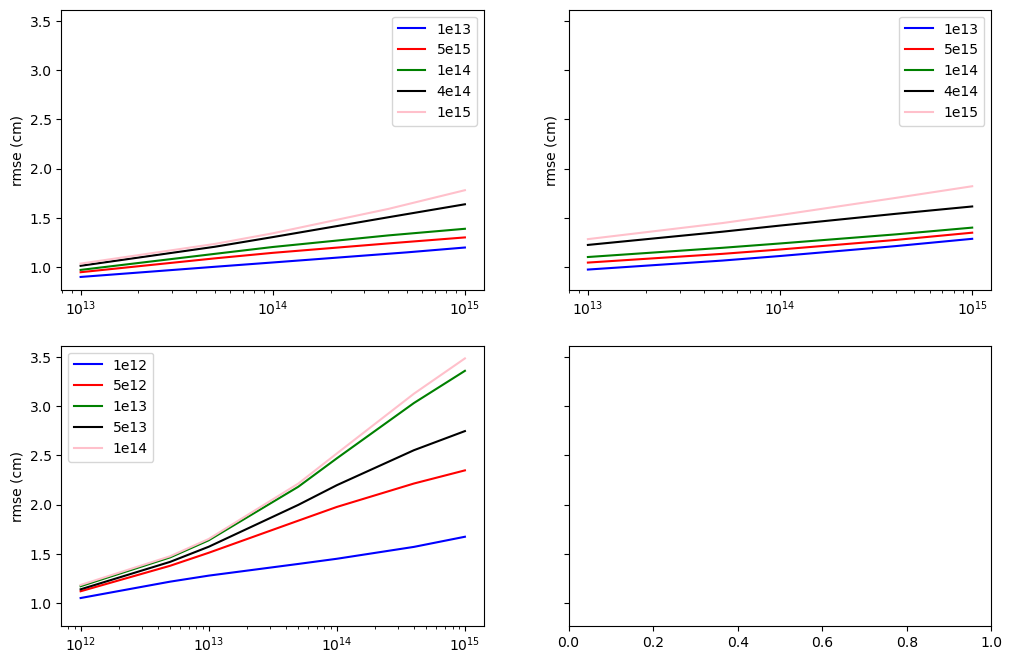

In [57]:
import matplotlib.pyplot as plt

plt.close('all')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True)
ax[0][0].set_ylabel("rmse (cm)")
ax[0][0].plot(f1e13_models["cmiSmoothing"], f1e13_models["rmse (cm)"], color="blue", label="1e13");
ax[0][0].plot(f5e13_models["cmiSmoothing"], f5e13_models["rmse (cm)"], color="red", label="5e15")
ax[0][0].plot(f1e14_models["cmiSmoothing"], f1e14_models["rmse (cm)"], color="green", label="1e14");
ax[0][0].plot(f4e14_models["cmiSmoothing"], f4e14_models["rmse (cm)"], color="black", label="4e14");
ax[0][0].plot(f1e15_models["cmiSmoothing"], f1e15_models["rmse (cm)"], color="pink", label="1e15");
ax[0][0].set_xscale("log")
ax[0][0].legend()

ax[0][1].set_ylabel("rmse (cm)")
ax[0][1].plot(f1e13_models2["cmiSmoothing"], f1e13_models2["rmse (cm)"], color="blue", label="1e13");
ax[0][1].plot(f5e13_models2["cmiSmoothing"], f5e13_models2["rmse (cm)"], color="red", label="5e15")
ax[0][1].plot(f1e14_models2["cmiSmoothing"], f1e14_models2["rmse (cm)"], color="green", label="1e14");
ax[0][1].plot(f4e14_models2["cmiSmoothing"], f4e14_models2["rmse (cm)"], color="black", label="4e14");
ax[0][1].plot(f1e15_models2["cmiSmoothing"], f1e15_models2["rmse (cm)"], color="pink", label="1e15");
ax[0][1].set_xscale("log")
ax[0][1].legend()

ax[1][0].set_ylabel("rmse (cm)")
ax[1][0].plot(f1e12_models3["cmiSmoothing"], f1e12_models3["rmse (cm)"], color="blue", label="1e12");
ax[1][0].plot(f5e12_models3["cmiSmoothing"], f5e12_models3["rmse (cm)"], color="red", label="5e12")
ax[1][0].plot(f1e13_models3["cmiSmoothing"], f5e13_models3["rmse (cm)"], color="green", label="1e13");
ax[1][0].plot(f5e13_models3["cmiSmoothing"], f1e13_models3["rmse (cm)"], color="black", label="5e13");
ax[1][0].plot(f1e14_models3["cmiSmoothing"], f1e14_models3["rmse (cm)"], color="pink", label="1e14");
ax[1][0].set_xscale("log")
ax[1][0].legend()

plt.show()


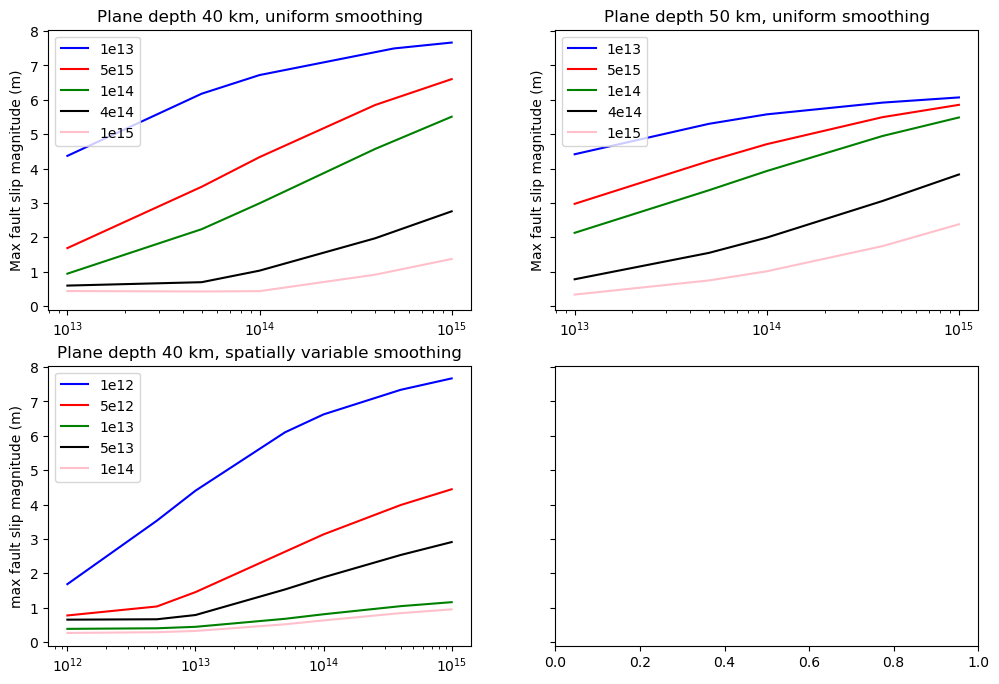

In [61]:

plt.close('all')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True)

ax[0][0].set_title("Plane depth 40 km, uniform smoothing")
ax[0][0].set_ylabel("Max fault slip magnitude (m)")
ax[0][0].plot(f1e13_models["cmiSmoothing"], f1e13_models["faultMaxMag (m)"], color="blue", label="1e13");
ax[0][0].plot(f5e13_models["cmiSmoothing"], f5e13_models["faultMaxMag (m)"], color="red", label="5e15")
ax[0][0].plot(f1e14_models["cmiSmoothing"], f1e14_models["faultMaxMag (m)"], color="green", label="1e14");
ax[0][0].plot(f4e14_models["cmiSmoothing"], f4e14_models["faultMaxMag (m)"], color="black", label="4e14");
ax[0][0].plot(f1e15_models["cmiSmoothing"], f1e15_models["faultMaxMag (m)"], color="pink", label="1e15");
ax[0][0].set_xscale("log")
ax[0][0].legend()

ax[0][1].set_title("Plane depth 50 km, uniform smoothing")
ax[0][1].set_ylabel("Max fault slip magnitude (m)")
ax[0][1].plot(f1e13_models2["cmiSmoothing"], f1e13_models2["faultMaxMag (m)"], color="blue", label="1e13");
ax[0][1].plot(f5e13_models2["cmiSmoothing"], f5e13_models2["faultMaxMag (m)"], color="red", label="5e15")
ax[0][1].plot(f1e14_models2["cmiSmoothing"], f1e14_models2["faultMaxMag (m)"], color="green", label="1e14");
ax[0][1].plot(f4e14_models2["cmiSmoothing"], f4e14_models2["faultMaxMag (m)"], color="black", label="4e14");
ax[0][1].plot(f1e15_models2["cmiSmoothing"], f1e15_models2["faultMaxMag (m)"], color="pink", label="1e15");
ax[0][1].set_xscale("log")
ax[0][1].legend()

ax[1][0].set_title("Plane depth 40 km, spatially variable smoothing")
ax[1][0].set_ylabel("max fault slip magnitude (m)")
ax[1][0].plot(f1e12_models3["cmiSmoothing"], f1e12_models3["faultMaxMag (m)"], color="blue", label="1e12");
ax[1][0].plot(f5e12_models3["cmiSmoothing"], f5e12_models3["faultMaxMag (m)"], color="red", label="5e12")
ax[1][0].plot(f1e13_models3["cmiSmoothing"], f5e13_models3["faultMaxMag (m)"], color="green", label="1e13");
ax[1][0].plot(f5e13_models3["cmiSmoothing"], f1e13_models3["faultMaxMag (m)"], color="black", label="5e13");
ax[1][0].plot(f1e14_models3["cmiSmoothing"], f1e14_models3["faultMaxMag (m)"], color="pink", label="1e14");
ax[1][0].set_xscale("log")
ax[1][0].legend()

plt.show()

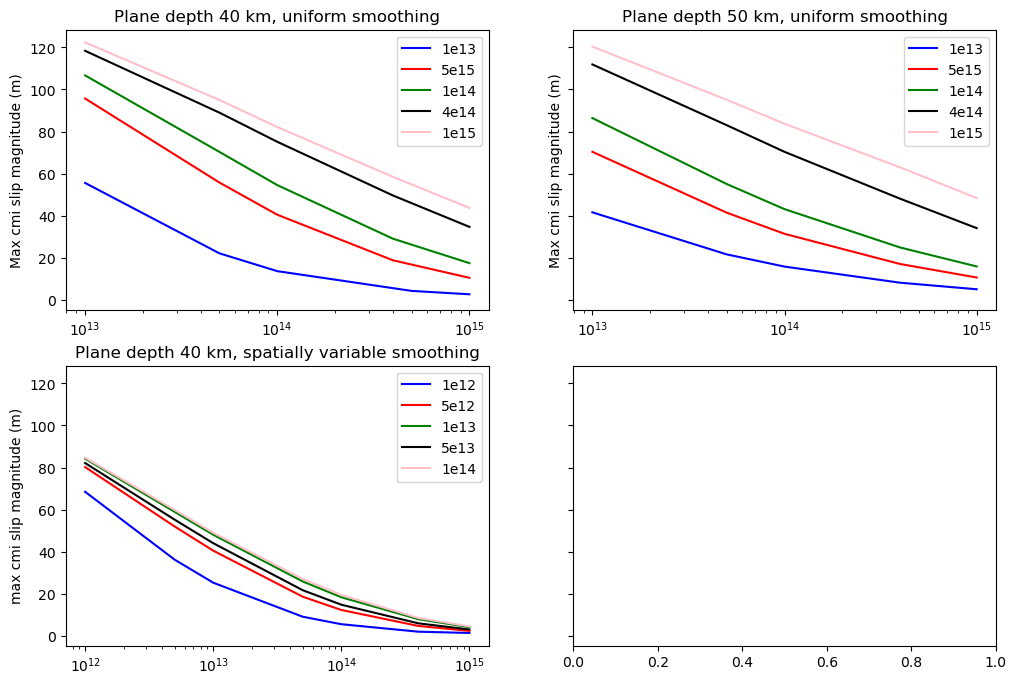

In [63]:
plt.close('all')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True)

ax[0][0].set_title("Plane depth 40 km, uniform smoothing")
ax[0][0].set_ylabel("Max cmi slip magnitude (m)")
ax[0][0].plot(f1e13_models["cmiSmoothing"], f1e13_models["cmiMaxMag (m)"], color="blue", label="1e13");
ax[0][0].plot(f5e13_models["cmiSmoothing"], f5e13_models["cmiMaxMag (m)"], color="red", label="5e15")
ax[0][0].plot(f1e14_models["cmiSmoothing"], f1e14_models["cmiMaxMag (m)"], color="green", label="1e14");
ax[0][0].plot(f4e14_models["cmiSmoothing"], f4e14_models["cmiMaxMag (m)"], color="black", label="4e14");
ax[0][0].plot(f1e15_models["cmiSmoothing"], f1e15_models["cmiMaxMag (m)"], color="pink", label="1e15");
ax[0][0].set_xscale("log")
ax[0][0].legend()

ax[0][1].set_title("Plane depth 50 km, uniform smoothing")
ax[0][1].set_ylabel("Max cmi slip magnitude (m)")
ax[0][1].plot(f1e13_models2["cmiSmoothing"], f1e13_models2["cmiMaxMag (m)"], color="blue", label="1e13");
ax[0][1].plot(f5e13_models2["cmiSmoothing"], f5e13_models2["cmiMaxMag (m)"], color="red", label="5e15")
ax[0][1].plot(f1e14_models2["cmiSmoothing"], f1e14_models2["cmiMaxMag (m)"], color="green", label="1e14");
ax[0][1].plot(f4e14_models2["cmiSmoothing"], f4e14_models2["cmiMaxMag (m)"], color="black", label="4e14");
ax[0][1].plot(f1e15_models2["cmiSmoothing"], f1e15_models2["cmiMaxMag (m)"], color="pink", label="1e15");
ax[0][1].set_xscale("log")
ax[0][1].legend()

ax[1][0].set_title("Plane depth 40 km, spatially variable smoothing")
ax[1][0].set_ylabel("max cmi slip magnitude (m)")
ax[1][0].plot(f1e12_models3["cmiSmoothing"], f1e12_models3["cmiMaxMag (m)"], color="blue", label="1e12");
ax[1][0].plot(f5e12_models3["cmiSmoothing"], f5e12_models3["cmiMaxMag (m)"], color="red", label="5e12")
ax[1][0].plot(f1e13_models3["cmiSmoothing"], f5e13_models3["cmiMaxMag (m)"], color="green", label="1e13");
ax[1][0].plot(f5e13_models3["cmiSmoothing"], f1e13_models3["cmiMaxMag (m)"], color="black", label="5e13");
ax[1][0].plot(f1e14_models3["cmiSmoothing"], f1e14_models3["cmiMaxMag (m)"], color="pink", label="1e14");
ax[1][0].set_xscale("log")
ax[1][0].legend()


plt.show()